In [1]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Asus\Documents\ml\dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#check datatypes
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
#check number of unique values in each categorical feature
cat_features = df.select_dtypes(include=['object'])
for col in cat_features.columns:
        print(col,':',len(cat_features[col].unique())," ",cat_features[col].unique())
    

cut : 5   ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : 7   ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : 8   ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [9]:
#building interaction between categorical data
interactions_cut_color = df['cut'] + "_" + df['color']
interactions_color_clarity = df['color']+ "_"+df['clarity']
interactions_cut_clarity = df['cut'] + "_" +df['clarity']

print(interactions_cut_color.head())
print(interactions_color_clarity.head())
print(interactions_cut_clarity.head())

0      Ideal_E
1    Premium_E
2       Good_E
3    Premium_I
4       Good_J
dtype: object
0    E_SI2
1    E_SI1
2    E_VS1
3    I_VS2
4    J_SI2
dtype: object
0      Ideal_SI2
1    Premium_SI1
2       Good_VS1
3    Premium_VS2
4       Good_SI2
dtype: object


In [10]:
#encoding using label encoding
df= df.assign(cut_color=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_cut_color))
df = df.assign(color_clarity=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_color_clarity))
df = df.assign(cut_clarity=sklearn.preprocessing.LabelEncoder().fit_transform(interactions_cut_clarity))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15,11,19
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,22,10,26
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,8,12,12
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,26,45,29
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,13,51,11


In [11]:
#Encode the catergorical data
#In our dataset cut,color,clarity are all ordinal variables...we can easily encode them by replacing with numerical values
cut_dict = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_dict = {'D':7 ,'E':6,'F':5,'G':4, 'H':3, 'I':2 , 'J':1}
clarity_dict = {'I1':1,'SI2':2,'SI1':3,'VS2':4 , 'VS1':5,'VVS2':6 , 'VVS1':7 ,  'IF':8}

df['cut'] = df['cut'].map(cut_dict)
df['color'] = df['color'].map(color_dict)
df['clarity'] = df['clarity'].map(clarity_dict)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,8,12,12
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11


                  carat       cut     color   clarity     depth     table  \
carat          1.000000 -0.134967 -0.291437 -0.352841  0.028224  0.181618   
cut           -0.134967  1.000000  0.020519  0.189175 -0.218055 -0.433405   
color         -0.291437  0.020519  1.000000 -0.025631 -0.047279 -0.026465   
clarity       -0.352841  0.189175 -0.025631  1.000000 -0.067384 -0.160327   
depth          0.028224 -0.218055 -0.047279 -0.067384  1.000000 -0.295779   
table          0.181618 -0.433405 -0.026465 -0.160327 -0.295779  1.000000   
price          0.921591 -0.053491 -0.172511 -0.146800 -0.010647  0.127134   
x              0.975094 -0.125565 -0.270287 -0.371999 -0.025289  0.195344   
y              0.951722 -0.121462 -0.263584 -0.358420 -0.029341  0.183760   
z              0.953387 -0.149323 -0.268227 -0.366952  0.094924  0.150929   
cut_color      0.083723 -0.033512 -0.230398  0.005569 -0.178144  0.152372   
color_clarity  0.263097 -0.004983 -0.992016  0.095264  0.040371  0.015217   

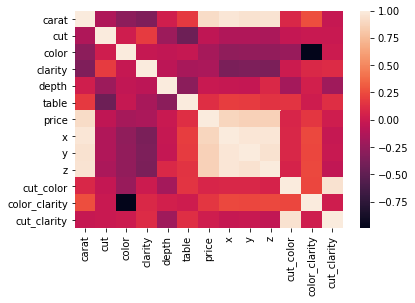

In [12]:
#Find correlation matrix and draw heatmap
corr = df.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

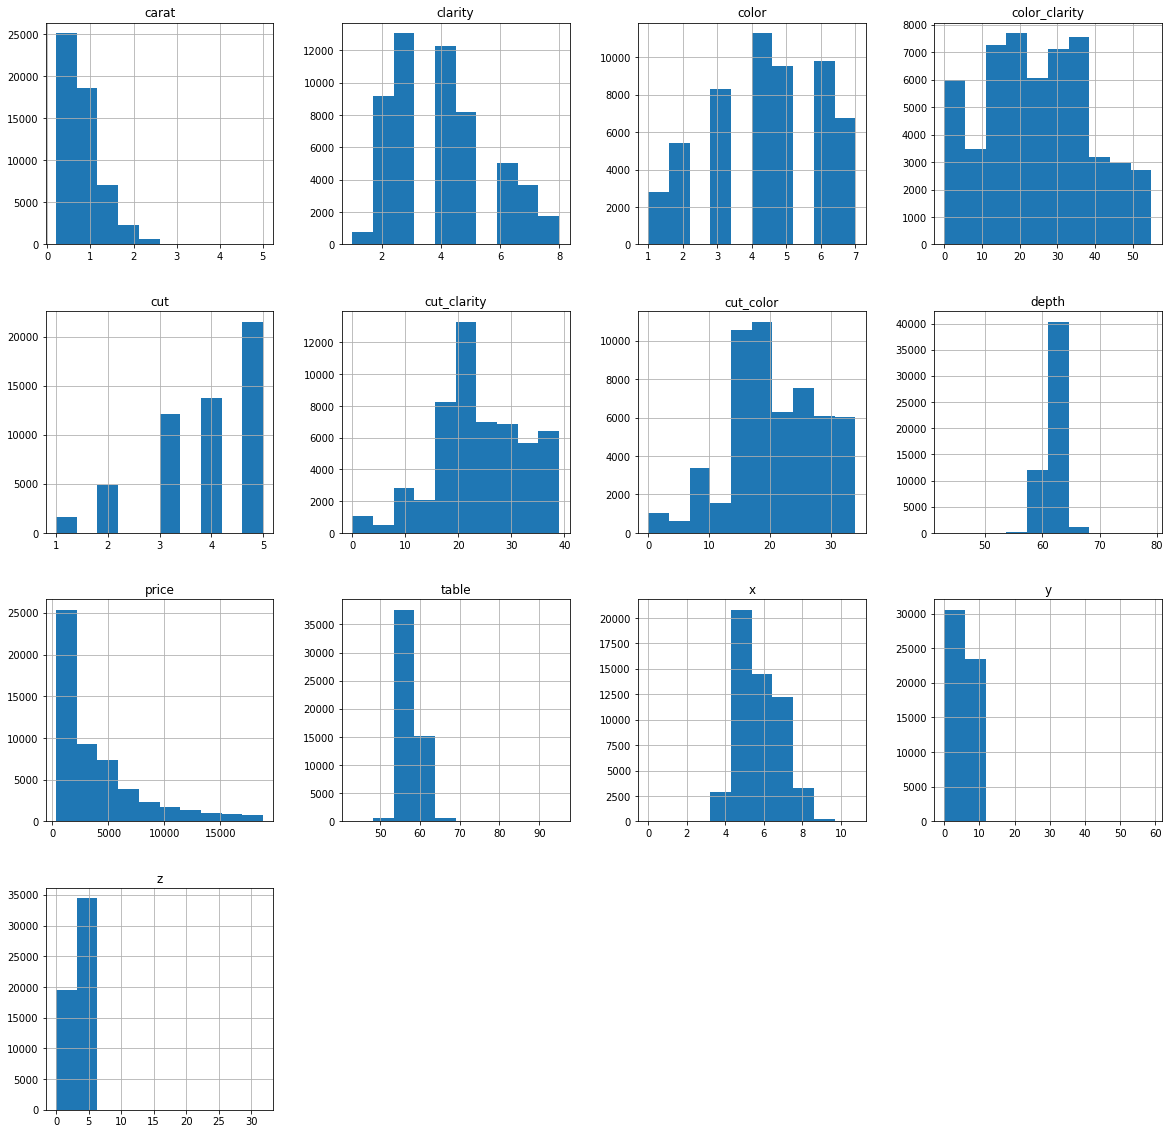

In [13]:
df.hist(figsize=(20,20))
plt.show()

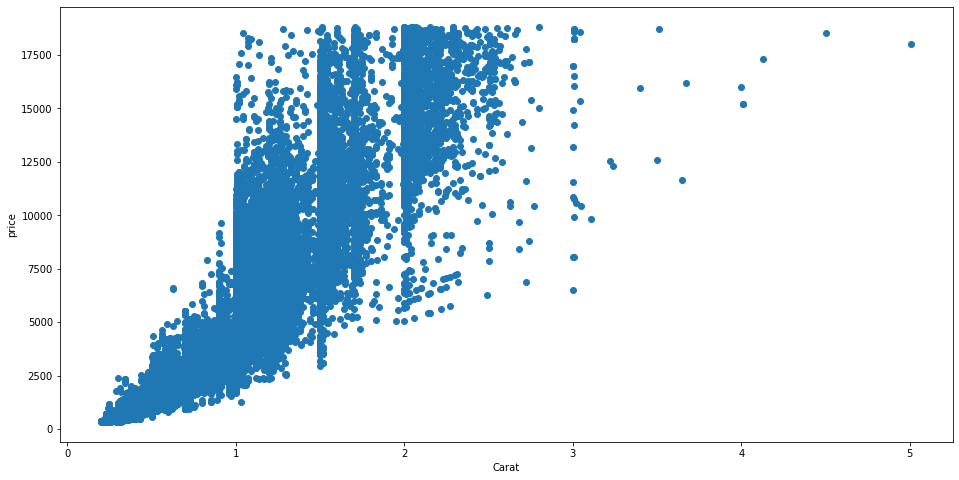

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['carat'],df['price'])
ax.set_xlabel('Carat')
ax.set_ylabel('price')
plt.show()

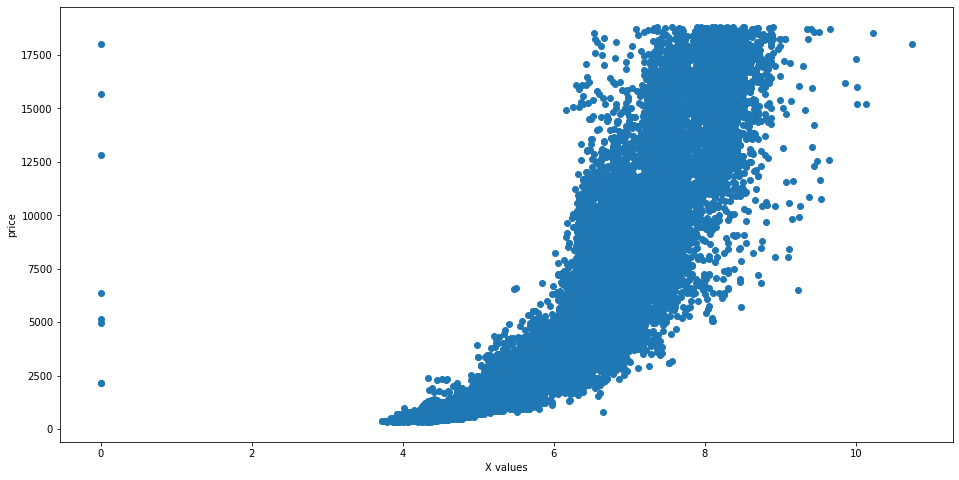

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x'],df['price'])
ax.set_xlabel('X values')
ax.set_ylabel('price')
plt.show()

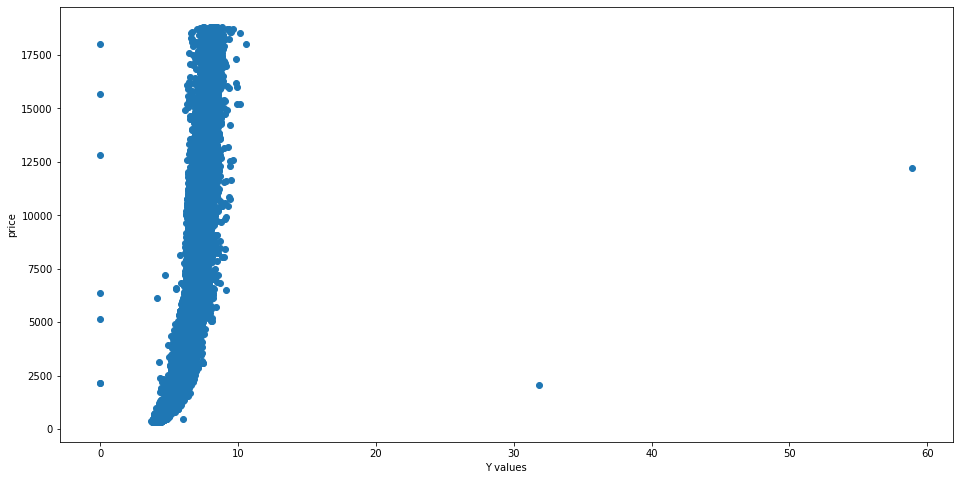

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['y'],df['price'])
ax.set_xlabel('Y values')
ax.set_ylabel('price')
plt.show()

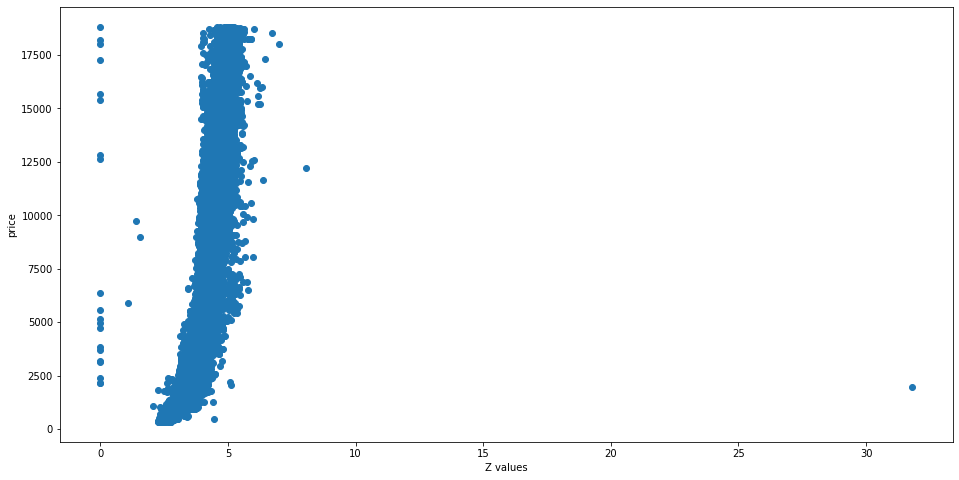

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['z'],df['price'])
ax.set_xlabel('Z values')
ax.set_ylabel('price')
plt.show()

In [18]:
#calculate price per carat
df['PricePerCarat'] = df['price'] / df['carat']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity,PricePerCarat
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19,1417.391304
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26,1552.380952
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,8,12,12,1421.739130
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29,1151.724138
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11,1080.645161


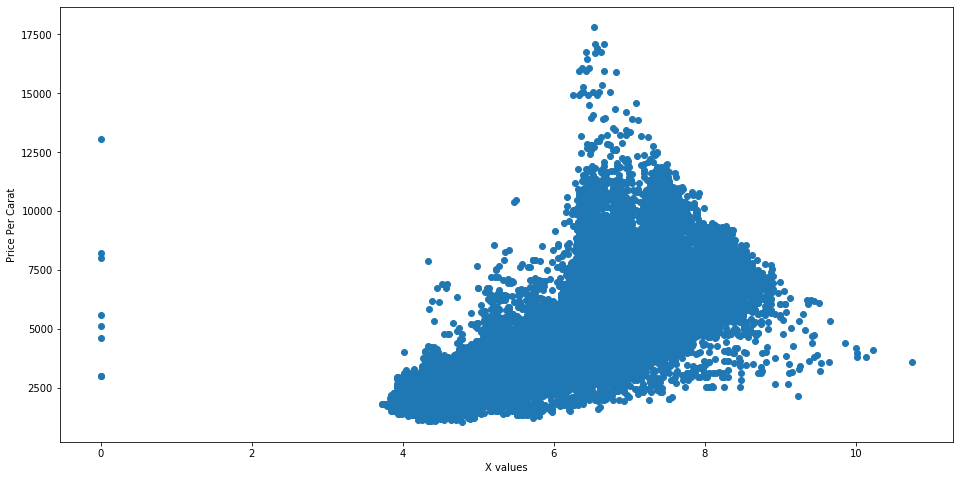

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x'],df['PricePerCarat'])
ax.set_xlabel('X values')
ax.set_ylabel('Price Per Carat')
plt.show()

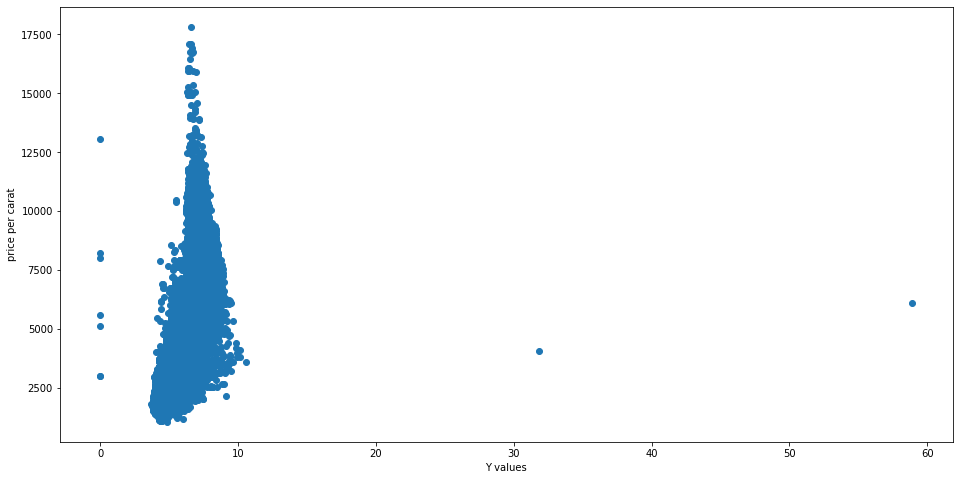

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['y'],df['PricePerCarat'])
ax.set_xlabel('Y values')
ax.set_ylabel('price per carat')
plt.show()

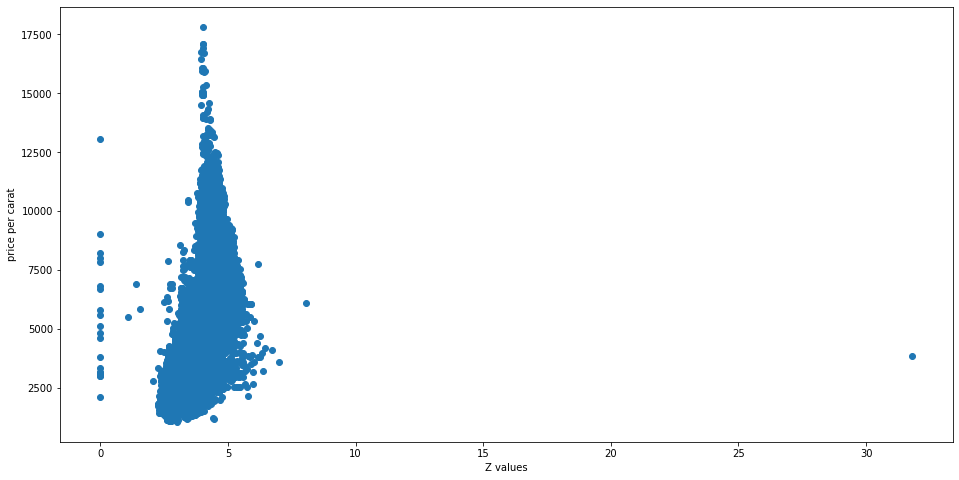

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['z'],df['PricePerCarat'])
ax.set_xlabel('Z values')
ax.set_ylabel('price per carat')
plt.show()

In [22]:
z = np.abs(stats.zscore(df))
print(z)

[[1.19816781 0.98147332 0.93716275 ... 0.99406105 0.62253249 1.28736106]
 [1.24036129 0.08588908 0.93716275 ... 1.06721441 0.20606247 1.22029036]
 [1.19816781 1.70527938 0.93716275 ... 0.9209077  1.45112744 1.28520081]
 ...
 [0.20662095 0.80969515 1.52502147 ... 1.65244124 1.15302813 0.03469231]
 [0.13092691 0.08588908 0.8264134  ... 0.76161946 0.32443317 0.39876879]
 [0.10113725 0.98147332 1.52502147 ... 1.57928789 0.62253249 0.16515305]]


In [23]:
df_o = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_o.shape)
df_o.head()

(53940, 14)
(51232, 14)


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_color,color_clarity,cut_clarity,PricePerCarat
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,15,11,19,1417.391304
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,22,10,26,1552.380952
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,26,45,29,1151.724138
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,13,51,11,1080.645161
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,34,55,39,1400.000000


In [24]:
#Separate price coloumn from rest of the data
y = df_o.price
y = y.astype(float)
print(y.head())
x = df_o.drop('price',axis=1)
print(x.head())

0    326.0
1    326.0
3    334.0
4    335.0
5    336.0
Name: price, dtype: float64
   carat  cut  color  clarity  depth  table     x     y     z  cut_color  \
0   0.23    5      6        2   61.5   55.0  3.95  3.98  2.43         15   
1   0.21    4      6        3   59.8   61.0  3.89  3.84  2.31         22   
3   0.29    4      2        4   62.4   58.0  4.20  4.23  2.63         26   
4   0.31    2      1        2   63.3   58.0  4.34  4.35  2.75         13   
5   0.24    3      1        6   62.8   57.0  3.94  3.96  2.48         34   

   color_clarity  cut_clarity  PricePerCarat  
0             11           19    1417.391304  
1             10           26    1552.380952  
3             45           29    1151.724138  
4             51           11    1080.645161  
5             55           39    1400.000000  


In [25]:
#Normalise the x dataset
scaler = preprocessing.MinMaxScaler()
normalised_x = scaler.fit_transform(x)
print(normalised_x)

[[0.01492537 1.         0.83333333 ... 0.2        0.48717949 0.04071445]
 [0.00497512 0.75       0.83333333 ... 0.18181818 0.66666667 0.05572156]
 [0.04477612 0.75       0.16666667 ... 0.81818182 0.74358974 0.01117963]
 ...
 [0.24875622 0.5        1.         ... 0.03636364 0.87179487 0.32099976]
 [0.32835821 0.75       0.33333333 ... 0.63636364 0.69230769 0.23953745]
 [0.27363184 1.         1.         ... 0.05454545 0.48717949 0.2918091 ]]


In [26]:
#Standardise the x dataset
scaler = preprocessing.StandardScaler()
standardised_x = scaler.fit_transform(x)
print(standardised_x)

[[-1.24074255  0.97996028  0.93042133 ... -0.98761867 -0.6857437
  -1.35405574]
 [-1.28782657  0.04642876  0.93042133 ... -1.06095587  0.17532319
  -1.27883929]
 [-1.09949046  0.04642876 -1.43025396 ...  1.50584606  0.54435186
  -1.50208592]
 ...
 [-0.13426788 -0.88710276  1.52059015 ... -1.64765345  1.15939964
   0.05074992]
 [ 0.24240435  0.04642876 -0.84008514 ...  0.77247408  0.29833275
  -0.35754374]
 [-0.0165578   0.97996028  1.52059015 ... -1.57431625 -0.6857437
  -0.09555531]]


In [27]:
#Multiple linear regression
lin_reg = sklearn.linear_model.LinearRegression()
MSEs = sklearn.model_selection.cross_val_score(lin_reg,standardised_x,y,scoring='neg_mean_squared_error',cv=15)
for i in range(15):
    MSEs[i] = math.sqrt(-MSEs[i])
print(MSEs)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

[284.24888402 343.95890725 348.49539726 401.17797025 425.53263123
 437.91784766 644.59344951 939.93126341 348.14356498 404.24189916
 418.58964489 385.42684588 261.00786977 291.57882833 297.87103262]
415.514402413682


In [28]:
#Ridge Regression
ridge = sklearn.linear_model.Ridge()
param = {'alpha':[1e-30,1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = sklearn.model_selection.GridSearchCV(ridge,param,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(standardised_x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-15}
-370631.1076201614


In [29]:
score = []
for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    ridge = sklearn.linear_model.Ridge(alpha=1e-15)
    ridge_result = ridge.fit(X_train, y_train)
    pred=ridge_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)

    rmse = math.sqrt(mse)
    score.append(rmse)
mean_score = np.mean(score)
print(score)
print(mean_score)
print("ridge coef:", ridge.coef_)

[399.02719242911286, 400.3087365145209, 396.7211107414115, 402.6234376302183, 395.285068088654, 400.3058565045998, 404.50707336822734, 398.02118859526985, 393.54006416778174, 397.8535503687831]
398.8193278408579
ridge coef: [ 4783.28995248   -17.9228788    630.17415485  -249.16764097
   -10.30550756   -58.92480616 -2049.1357866    142.47566061
 -1663.92436284   411.53936673   681.86523285  -403.4048761
  2163.88875388]


In [30]:
#lasso Regression
lasso = sklearn.linear_model.Lasso()
param = {'alpha':[1e-30,1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = sklearn.model_selection.GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(standardised_x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 1e-15}
-369529.4177636771


In [31]:
score = []
for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    lasso = sklearn.linear_model.Lasso(alpha=1e-15)
    lasso_result = lasso.fit(X_train, y_train)
    pred=lasso_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)

    rmse = math.sqrt(mse)
    score.append(rmse)
mean_score = np.mean(score)
print(score)
print(mean_score)
print("lasso coef:", lasso.coef_)


[400.0827377761609, 395.70427837945334, 401.9938893939517, 389.6504255712789, 401.6681257128868, 397.53509489183534, 397.626773560407, 399.68793355439476, 391.2721666430863, 397.49265117460095]
397.2714076658056
lasso coef: [ 4787.4393119    -19.01373143   684.03442312  -246.9671762
  -110.92483645   -60.61226481 -2452.02227333  -316.82438708
  -801.05487426   446.41774283   727.46805196  -438.47447685
  2160.86447544]


In [26]:
#Elastic Net Regression
elastic=sklearn.linear_model.ElasticNet()
search=sklearn.model_selection.GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(standardised_x,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
369608.52018594235


In [27]:
score = []
for _ in range(10):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(standardised_x, y, test_size=0.20)
    elastic = sklearn.linear_model.ElasticNet(alpha=1e-05,l1_ratio=0.8)
    elastic_result = elastic.fit(X_train, y_train)
    pred=elastic_result.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred)

    rmse = math.sqrt(mse)
    score.append(rmse)
mean_score = np.mean(score)
print(score)
print(mean_score)

[402.1857473412616, 396.7779158155234, 399.1392998018023, 400.96834443042377, 406.68541197853654, 391.63769816219633, 395.252528461239, 401.9115675331071, 394.458428599348, 397.19965976639503]
398.6216601889833


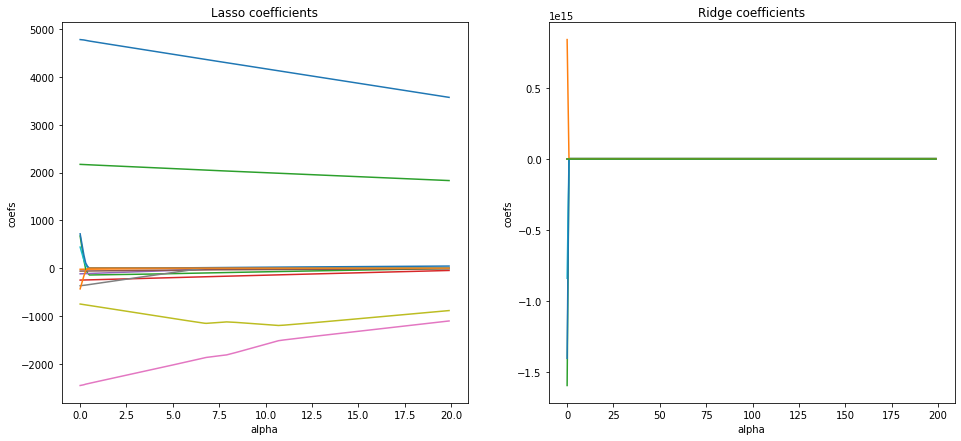

In [69]:
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = sklearn.linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = sklearn.linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_)

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()